# HSE 2022: Mathematical Methods for Data Analysis

## Homework 1

### Attention!
* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task. 
Loops are only allowed in part 1 (Tasks 1 - 4). 
* Some tasks contain tests. They only test you solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task. 

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 points) 

**Task 1** (0.5 points)<br/> 
Enter nonzero numbers `a`,  `r` and `N`. Find the first `N` members of geometric progression with the first member `a` and factor `r`, without using formula for the product.

In [3]:
def find_product(a,r,N):
    ## Your code here
    i = 0
    arr_product = []
    arr_product.append(a)
    while i < N - 1:
        a *= r
        arr_product.append(a)
        i += 1
    return arr_product

a = 2
r = 3
N = 3
print(find_product(a,r,N))

[2, 6, 18]


**Task 2** (0.5 points) <br/> 
Enter an integer number `N`. Check if it is a palindrome number. It means that it can be read equally from left to right and from right to back. 

In [4]:
def check_palindrome(N):
    ## Your code here
    initial_N = N
    reversed_N = 0
    while N > 0:
        reversed_N = 10 * reversed_N + N % 10
        N = N // 10
    if reversed_N == initial_N:
        check_palindrome = True
    else:
        check_palindrome = False
    return check_palindrome

for N in [3, 81, 111, 113, 810, 2022, 4774, 51315, 611816]:
    print(N, check_palindrome(N))

3 True
81 False
111 True
113 False
810 False
2022 False
4774 True
51315 True
611816 False


**Task 3** (0.5 points) <br/> 
Find the first `N` palindrome numbers starting from 1000 (you may use the function from the precious task).

In [5]:
def find_palindromes(N):
    ## Your code here
    number_of_palindromes = 0
    pointer = 1000
    palindromes = []
    while number_of_palindromes < N:
        if check_palindrome(pointer):
            palindromes.append(pointer)
            number_of_palindromes += 1
        pointer += 1
    return palindromes

print(find_palindromes(5))
print(find_palindromes(10))
print(find_palindromes(20))

[1001, 1111, 1221, 1331, 1441]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991]
[1001, 1111, 1221, 1331, 1441, 1551, 1661, 1771, 1881, 1991, 2002, 2112, 2222, 2332, 2442, 2552, 2662, 2772, 2882, 2992]


**Task 4** (0.5 points) <br/> 
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the minimum number.

In [6]:
from random import randint
def find_min(a, b, c):
    ## Your code here
    min_ = a
    if b < min_:
        min_ = b
    if c < min_:
        min_ = c
    return min_

for i in range(10):
    
    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)
    
    print(a, b, c, '\tMinimum:', find_min(a, b, c))

-83 95 20 	Minimum: -83
-62 3 -30 	Minimum: -62
-41 -40 -34 	Minimum: -41
-28 -99 -30 	Minimum: -99
100 9 -89 	Minimum: -89
-94 68 36 	Minimum: -94
-10 -50 -8 	Minimum: -50
64 19 83 	Minimum: 19
-91 27 -2 	Minimum: -91
36 -89 80 	Minimum: -89


# 2. Numpy (4 points)

**Task 1** (0.5 points) <br/>
Create a random array (`np.random.rand()`) with length of 17 and with sum of its elements equals to 6.

In [7]:
np.random.seed(42)
my_array = np.random.rand(17)
my_array -= (my_array.sum() - 6) / 17
print(f'Length: {len(my_array)}')
print(f'Sum of elements: {np.sum(my_array)}')

Length: 17
Sum of elements: 6.0


**Task 2** (0.5 points) <br/>
Create two random arrays $a$ and $b$ with the same length. 

Calculate the following distances between the arrays **without using special funcrion. You may only use basic numpy operations (`np.linalg.*` and other high-level ones are prohibited).**:

* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Chebyshev Distance
$$ d(a, b) = \underset{i}{max} |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2} $$

In [8]:
def calculate_manhattan(a, b):
    ## Your code here
    distance = np.sum(np.abs(a - b))
    return distance

def calculate_euclidean(a, b):
    ## Your code here
    distance = np.sqrt(np.sum((a - b) * (a - b)))
    return distance

def calculate_chebyshev(a, b):
    ## Your code here
    distance = np.max(np.abs(a - b))
    return distance

def calculate_cosine(a, b):
    ## Your code here
    distance = 1 - np.sum(a * b) / (np.sqrt(np.sum(a * a)) * np.sqrt(np.sum(b * b)))
    return distance
np.random.seed(42)
a = np.random.randint(15, size = 10)
b = np.random.randint(15, size = 10)
print(a)
print(b)
print(f'Manhattan distance: {calculate_manhattan(a, b)}')
print(f'Euclidean distance: {calculate_euclidean(a, b)}')
print(f'Chebyshev distance: {calculate_chebyshev(a, b)}')
print(f'Cosine distance: {calculate_cosine(a, b)}')

[ 6  3 12 14 10  7 12  4  6  9]
[ 2  6 10 10  7  4  3  7  7  2]
Manhattan distance: 39
Euclidean distance: 14.247806848775006
Chebyshev distance: 9
Cosine distance: 0.1185191768279742


**Task 3** (0.5 points) <br/>
Create a random array (`np.random.randint()`) with length of 76. Transform the array so that 
* Maximum element(s) value is -1
* Minimum element(s) value is -4
* Other values are in interval (-4; -1) with keeping the order

In [9]:
def transform(array):
    ## Your code here
    transformed_array = np.arange(-4, 0)
    transformed_array = np.tile(transformed_array, 19)
    return transformed_array

my_array = np.random.rand(76)
my_array = transform(my_array)
print(f'Min: {np.min(my_array)}')
print(f'Max: {np.max(my_array)}')
print('Array:')
print(my_array)

Min: -4
Max: -1
Array:
[-4 -3 -2 -1 -4 -3 -2 -1 -4 -3 -2 -1 -4 -3 -2 -1 -4 -3 -2 -1 -4 -3 -2 -1
 -4 -3 -2 -1 -4 -3 -2 -1 -4 -3 -2 -1 -4 -3 -2 -1 -4 -3 -2 -1 -4 -3 -2 -1
 -4 -3 -2 -1 -4 -3 -2 -1 -4 -3 -2 -1 -4 -3 -2 -1 -4 -3 -2 -1 -4 -3 -2 -1
 -4 -3 -2 -1]


**Task 4** (0.5 points) <br/>
Create an array with shape of $8 \times 5$ with integers from [-7, 43]. Print a column that contains the maximum element of the array.

In [10]:
my_array = np.random.randint(low = -7, high = 43, size = [8, 5])
selected_column = my_array[:, np.argmax(np.max(my_array, axis=0))]
print('Shape: ', my_array.shape)
print('Array:')
print(my_array)
print(f'Selected column: {selected_column}')

Shape:  (8, 5)
Array:
[[27 36 32 14 19]
 [27 -7 27 29 39]
 [ 6 -5 -7 -3 18]
 [ 6 31 19  1  7]
 [ 7 18 34  5 24]
 [31 41 24 -4 22]
 [29 15 31 37  7]
 [35 21 28  5 24]]
Selected column: [36 -7 -5 31 18 41 15 21]


**Task 5** (0.5 points) <br/>

Replace all missing values in the following array with median.

In [11]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

print('Array:')
print(arr)

Array:
[0.59886547 0.69478493 0.88046784 0.62435405 0.29563369 0.10549426
        nan 0.21844044        nan        nan]


In [12]:
def replace_missing(arr):
    ## Your code here
    median = np.nanmedian(arr)
    print ('Median:')
    print (median)
    arr[np.isnan(arr)] = median
    array_without_missing = arr
    return array_without_missing

In [13]:
arr = replace_missing(arr)
print('Array with no missing values:')
print(arr)

Median:
0.598865466488536
Array with no missing values:
[0.59886547 0.69478493 0.88046784 0.62435405 0.29563369 0.10549426
 0.59886547 0.21844044 0.59886547 0.59886547]


**Task 6** (0.5 points) <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the mean for all 3 channels (a vector of shape 3).

In [14]:
def mean_channel(X):
    # Your code here
    mean_vector = X.mean(axis = (0,1))
    return mean_vector

In [15]:
n = 19
m = 23
X =  np.random.randint(-11, 8, size=(n, m, 3))
X = mean_channel(X)
print(f'Mean vector: {X}')

Mean vector: [-2.49427918 -1.6201373  -2.33867277]


### **Task 7** (1 points) <br/>
Create a function which takes a 3D matrix ```X``` as an input and returns all its unique vertical (first axis) layers.

Sample input:

     ([[[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]
        [4, 5, 6]],

       [[7, 8, 9],
        [7, 8, 9]
        [7, 8, 9]]])
        
Sample output:

     ([[[1, 2, 3],
        [1, 2, 3]],

       [[4, 5, 6],
        [4, 5, 7]],

       [[7, 8, 9],
        [7, 8, 9]]])

In [16]:
def get_unique_columns(X):
    ## Your code here
    X_unique = np.unique(X, axis = 1)
    return X_unique

In [17]:
X =  np.random.randint(1, 3, size=(3, 3, 3))
print('Matrix:')
print(X)
print('Unique rows:')
get_unique_columns(X)

Matrix:
[[[2 2 1]
  [1 2 2]
  [1 1 2]]

 [[2 2 2]
  [1 2 2]
  [1 2 1]]

 [[2 2 1]
  [1 2 2]
  [2 1 2]]]
Unique rows:


array([[[1, 1, 2],
        [1, 2, 2],
        [2, 2, 1]],

       [[1, 2, 1],
        [1, 2, 2],
        [2, 2, 2]],

       [[2, 1, 2],
        [1, 2, 2],
        [2, 2, 1]]])

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task wont't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

**Task 0** (0 points) \
Load the dataset and print first 5 rows

In [18]:
import pandas as pd
dataset =  pd.read_csv("titanic.csv")
dataset.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Task 1** (1 points) <br/>
Answer the following questions:
    
    * Are there any missing values? In what columns?
    * What is the percentage of survived passengers? Are the classes balanced?
    * Were there more males or females?
    * What what the least popular port of embarkation?
    * How many classes (pclass) were there on Tinanic?
    * What is the overall average ticket fare? And for every class?
Please, write not only the answers but the code, proving it.

Да, в данном датасете встречаются Nan-значения. Колонки, в которых присутствуют
такие значения: Age, Cabin, Embarked

In [19]:
# Proof
dataset.columns[dataset.isna().any()].tolist()

['Age', 'Cabin', 'Embarked']

In [20]:
print('The percentage of survived passengers: ')
print (dataset["Survived"].value_counts()[1] / dataset.shape[0] * 100, '%')

The percentage of survived passengers: 
38.38383838383838 %


Классы не являются сбалансированными, так как их доли в выборке значительно отличаются.
Доля выживших - меньше 50%,  доля погибших - больше 50%

In [21]:
males_count = dataset["Sex"].value_counts()["male"]
print("Amount of males: ", males_count)
females_count = dataset["Sex"].value_counts()["female"]
print("Amount of females: ", females_count)

if males_count > females_count:
    print("Males were more")
else:
    print("Females were more")

Amount of males:  577
Amount of females:  314
Males were more


In [22]:
print ('Amounts of ports: ')
dataset["Embarked"].value_counts()

Amounts of ports: 


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
print('The least popular port was: ')
dataset["Embarked"].value_counts().sort_values().index.tolist()[0]

The least popular port was: 


'Q'

In [24]:
print('The amount of classes on Titanic: ')
dataset["Pclass"].nunique()

The amount of classes on Titanic: 


3

In [25]:
print('Overall ticket price average: ')
dataset["Fare"].mean()

Overall ticket price average: 


32.204207968574636

In [26]:
print('Ticket price average for each class: ')
dataset.groupby("Pclass").Fare.mean()

Ticket price average for each class: 


Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

**Task 2** (0.5 points) <br/>
Visualize age distribution (you may use a histogram, for example). 

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the mean age? And among males and females sepatately? Visualize it on the plot
    * Make conclusions about what you see on the plot

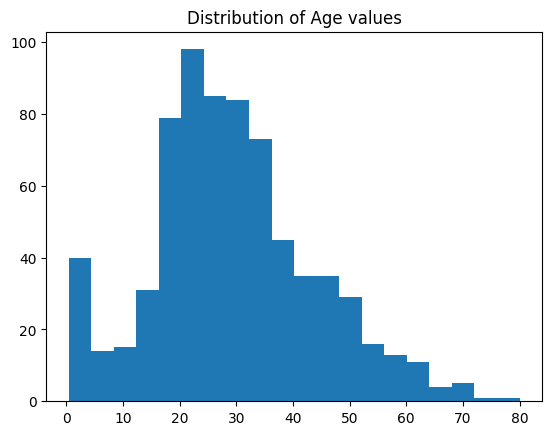

Minimal age of the passengers:  0.42
Maximal age of the passengers:  80.0


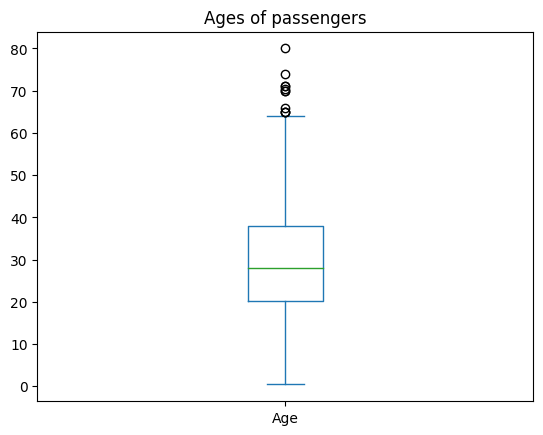

The mean age:  29.69911764705882
The mean age among females:  27.915708812260537
The mean age among males:  30.72664459161148


female         AxesSubplot(0.1,0.15;0.363636x0.75)
male      AxesSubplot(0.536364,0.15;0.363636x0.75)
dtype: object

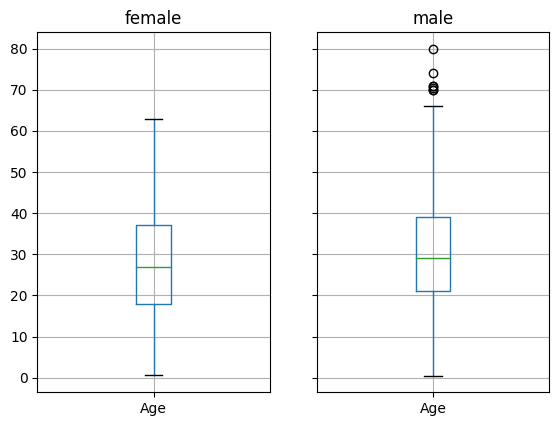

In [27]:
plt.hist(dataset["Age"], bins = 20)
plt.title('Distribution of Age values')
plt.show()

print('Minimal age of the passengers: ', dataset.Age.min())
print('Maximal age of the passengers: ', dataset.Age.max())

dataset['Age'].plot(kind='box', title='Ages of passengers')
plt.show()

print('The mean age: ', dataset["Age"].mean())

print('The mean age among females: ', dataset[dataset.Sex == "female"].Age.mean())
print('The mean age among males: ', dataset[dataset.Sex == "male"].Age.mean())
dataset.groupby("Sex").boxplot(column = "Age")

Выводы по графику "Distribution of Age values":
1) Большая часть пассажиров Титаника были в возрасте от 20 до 40 лет.
2) На корабле было довольно много маленьких детей от 0 до 4-х лет - 40 человек. Это примерно
равно количеству людей в возрасте от 50 до 80 лет вместе взятых.
3) Молодых людей и детей на корабле было больше, чем людей среднего и пожилого возраста.

Выводы по box-plot "Ages of passengers":
1) 75% пассажиров младше 40 лет.
2) 25% пассажиров младше 21 года.
3) Максимальный возраст без учета выбросов - 65 лет.
4) Минимальный возраст в соответствии с расчетами - 0.42, график подтверждает это.
5) Примерно 50% пассажиров младше 30 лет.
6) В выборке присутствует довольно много выбросов - пожилых людей в возрасте от 70 до 80 лет.

Выводы по boxplot - ам "Female" и "Male":
1) Максимальный возраст без учета выбросов среди мужчин больше, чем среди женщин.
2) Также все выбросы, которые встречаются в выборке, относятся только к мужчинам.
3) Минимальный возраст примерно одинаковый как у мужчин, так и у женщин.
4) Среднее значение возрастов женщин меньше, чем среднее значение возрастов всех
пассажиров, а среднее значение возрастов мужчин больше, чем среднее значение возрастов
всех пассажиров.
5) Верхний и нижний квартили женщин меньше верхнего и нижнего квартиля мужчин соответственно.

**Task 3** (1 points) <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column Name, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot.

In [28]:
def title_extraction(string):
    first, second = string.split(".", 1)
    return first.split()[-1]

In [29]:
column = dataset.Name.apply(title_extraction)
print('Amount of unique titles: ')
column.nunique()

Amount of unique titles: 


17

In [30]:
print('Amounts of passengers of each title: ')
column.value_counts()

Amounts of passengers of each title: 


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Name, dtype: int64

In [31]:
print('Amounts of women of each woman title: ')
column[dataset.Sex == "female"].value_counts()

Amounts of women of each woman title: 


Miss        182
Mrs         125
Mlle          2
Mme           1
Ms            1
Lady          1
Countess      1
Dr            1
Name: Name, dtype: int64

In [32]:
print('The most popular woman title: ')
column[dataset.Sex == "female"].value_counts().index.tolist()[0]

The most popular woman title: 


'Miss'

In [33]:
print('Amounts of men of each man title: ')
column[dataset.Sex == "male"].value_counts()

Amounts of men of each man title: 


Mr          517
Master       40
Rev           6
Dr            6
Major         2
Col           2
Don           1
Sir           1
Capt          1
Jonkheer      1
Name: Name, dtype: int64

In [34]:
print('The most popular man title: ')
column[dataset.Sex == "male"].value_counts().index.tolist()[0]

The most popular man title: 


'Mr'

**Task 4** (0.5 points) <br/>
Is there correlation between *pclass* and *ticket price*? Calculate mean price for each port and visualize prize distribution for each port. Make conclusions about what you see on the plot

Hint: you could make one or several plot types i.e.  box, violine, pair, histogram (see additional notebooks for Seminar 1 "Visualization with Seaborn"). main point here is to **choose** plots wisely and **make meaningful conclusions**


In [35]:
print('Correlation between pclass and ticket price: ')
dataset.corr(numeric_only=True)["Pclass"]["Fare"]

Correlation between pclass and ticket price: 


-0.5494996199439076

Между pclass и ticket price есть отрицательная корреляция средней силы. Это указывает на то, что
чем меньше номер класса, тем выше цена на билет на него. Это заключение вполне
правдоподобно.

In [36]:
print('Ticket price mean value for each class: ')
dataset.groupby("Pclass").Fare.mean()

Ticket price mean value for each class: 


Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

Price distribution for each class: 


Text(0.5, 1.0, 'Price distribution for each class')

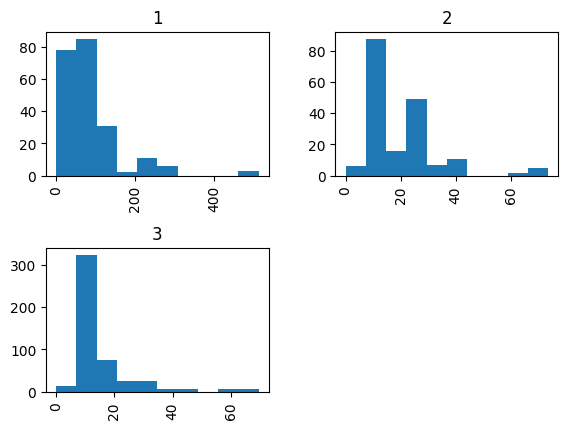

In [37]:
print('Price distribution for each class: ')
dataset['Fare'].hist(by = dataset['Pclass'])
plt.title('Price distribution for each class')

Анализ графиков распределения цены для каждого класса:
1) Большинство пассажиров 1 класса заплатили за свой билет больше 100.
2) Все пассажиры 2 и 3 классов заплатили за свои билеты меньше 100.
3) Большая часть пассажиров 3 класса заплатили за билет на Титаник менее 20.
4) Цена билета 2 класса в основном находится в диапазоне от 15 до 40.
5) В распределении цен 1 класса есть очень большой выброс - 400.

**Task 5** (0.5 points) <br/>
The same question as in task 4 about correlation between *embarked* and *ticket priсe*.

In [46]:
dataset['Embarked'] = dataset['Embarked'].astype('category')
dataset["Embarked_category"] = dataset["Embarked"].cat.codes
print('Correlation between embarked and ticket price: ')
dataset.corr(numeric_only=True)["Embarked_category"]["Fare"]
#dataset.Embarked_category.fillna(-1).corr(dataset.Fare)

Correlation between embarked and ticket price: 


-0.23036457312463007

Между портами и ценой билета есть слабая отрицательная корреляция.

In [ ]:
print('Ticket price mean value for each port: ')
dataset.groupby("Embarked").Fare.mean()

In [ ]:
plt.figure(figsize = (10, 10))
sns.violinplot(dataset, x = 'Fare', y = 'Embarked',  hue = "Embarked")
plt.title('Price distribution for each port')
plt.show()

Анализ графика распределения цен для каждого порта:
1) Самые большие выбросы цен на билеты наблюдаются при отправлении из порта C.
2) Распределение цен на билеты при отправлении из порта C имеет наибольший межквартильный размах.
3) При отправлении из порта Q цена билета с наибольшей вероятностью будет примерно на
уровне 20.
4) Средние значения цен при отправлении из портов Q и S находятся примерно на одном уровне.
5) Максимальное значение цены на билет при отправлении из порта C без учета выбросов -
примерно 150.

**Task 6** (0.5 points) <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Provide the same visualization for males and females separately. Make conclusions about what you see on the plots

In [ ]:
print('Age distribution for survived and not survived passengers')
dataset['Survived'] = dataset['Survived'].replace(to_replace = 0, value = 'Died')
dataset['Survived'] = dataset['Survived'].replace(to_replace = 1, value = 'Survived')
dataset['Age'].hist(by = dataset['Survived'])


In [ ]:
print('Age distribution for survived and not survived female passengers')
dataset[dataset.Sex == 'female']['Age'].hist(by = dataset['Survived'])


In [ ]:
print('Age distribution for survived and not survived male passengers')
dataset[dataset.Sex == 'male']['Age'].hist(by = dataset['Survived'])


In [ ]:
print('Mean ages for each class: ')
dataset.groupby("Pclass").Age.mean()

Средние значения возраста для разных классов различаются. Наименьшее среднее значение у 3
класса. Наибольшее - у 1 класса. Можно предположить, что среди обеспеченных людей,
путешествовавших 1 классом, было больше людей старшего возраста, когда как молодежь
чаще могла позволить себе билет только 3 класса.

Выводы по графикам:
1) Среди детей от 0 до 18 лет выживших больше, чем погибших.
2) Среди остальных возрастных категорий число погибших превышает число выживших.
3) У женщин практически во всех возрастных категориях число выживших значительно превышает.
число погибших.
4) Среди мужчин от 20 до 40 лет количество погибших значительно превышает количество выживших.
5) У мужчин старшего возраста от 70 до 80 лет (выбросы) наблюдается хорошая выживаемость.
